In [1]:
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


This file used to generate some pics for the poster. It will go through the LassoRegression, KNN, RandomForest, 
XGBoost and Neural Network one by one.

For each model, It will go through the baseline model. Then model selection and the parameter optimization will be applied.
After that, we will choose the best model parameter to train the model. The the performance of each model will be compared.

Good Luck and Happy Code

## Lasso Regression
This algorithm is made my Osten. Only one parameter in this algorithm. Let's do it 

In [2]:
# Necessnary model
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
path = "Data/CleanedData.csv"

In [3]:
# Load Data for Lasso

from LassoRegression.LassoRegression_CS235 import  Load_Data as Load_Data_Lasso, Lasso
# from sklearn.linear_model import Lasso

X_train_lasso, X_test_lasso, Y_train_lasso, Y_test_lasso = Load_Data_Lasso(path)

rs = ShuffleSplit(n_splits=5, random_state=0, test_size=0.20, train_size=None)

lasso_baseline = {"lamda": [0.1],
                  "CV error": [],
                  "CV std": []}

# Test CV 5
cv_train_error_lasso = []
cv_val_error_lasso = []
for train_split_index, test_split_index in rs.split(X_train_lasso, Y_train_lasso):
    # Split Dataset
    X_train_tmp = X_train_lasso[train_split_index]
    Y_train_tmp = Y_train_lasso[train_split_index]
    X_val_tmp = X_train_lasso[test_split_index]
    Y_val_tmp = Y_train_lasso[test_split_index]

    lasso_tmp = Lasso()
    lasso_tmp.fit(X_train_tmp, Y_train_tmp)
    
    cv_train_error_lasso.append(mean_squared_error(Y_train_tmp, lasso_tmp.predict(X_train_tmp)))
    cv_val_error_lasso.append(mean_squared_error(Y_val_tmp, lasso_tmp.predict(X_val_tmp)))

# Baseline Result 
lasso_baseline["CV error"].append(np.mean(cv_val_error_lasso))
lasso_baseline["CV std"].append(np.std(cv_val_error_lasso))
lasso_baseline = pd.DataFrame(lasso_baseline)
lasso_baseline
# """
# Here are result
# -----------------------
# 	lamda	CV error	CV std
# 0	0.1	0.460648	0.008482
# """

,lamda,CV error,CV std
0,0.1,0.465262,0.008191


In [4]:
# Now optimize the parameter lambda 
lasso = {"lamda": [],
                  "CV error": [],
                  "CV std": []}

lam_list = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1] 

for lam in lam_list:
    # Test CV 5
    cv_train_error_lasso = []
    cv_val_error_lasso = []
    for train_split_index, test_split_index in rs.split(X_train_lasso, Y_train_lasso):
        # Split Dataset
        X_train_tmp = X_train_lasso[train_split_index]
        Y_train_tmp = Y_train_lasso[train_split_index]
        X_val_tmp = X_train_lasso[test_split_index]
        Y_val_tmp = Y_train_lasso[test_split_index]
    
        lasso_tmp = Lasso(lam)
        lasso_tmp.fit(X_train_tmp, Y_train_tmp)
        
        cv_train_error_lasso.append(mean_squared_error(Y_train_tmp, lasso_tmp.predict(X_train_tmp)))
        cv_val_error_lasso.append(mean_squared_error(Y_val_tmp, lasso_tmp.predict(X_val_tmp)))

    # Baseline Result 
    lasso["lamda"].append(lam)
    lasso["CV error"].append(np.mean(cv_val_error_lasso))
    lasso["CV std"].append(np.std(cv_val_error_lasso))
lasso = pd.DataFrame(lasso)
lasso


# """
# Here are result
# -----------------------
#   lamda	CV error	CV std
# 0	0.0001	0.460613	0.008482
# 1	0.0010	0.460616	0.008482
# 2	0.0050	0.460630	0.008482
# 3	0.0100	0.460648	0.008482
# 4	0.0500	0.460791	0.008481
# 5	0.1000	0.460970	0.008480
# 6	0.3000	0.461689	0.008474
# 7	1.0000	0.464303	0.008450
# """    

,lamda,CV error,CV std
0,0.0001,0.465225,0.008191
1,0.0010,0.465229,0.008191
2,0.0050,0.465244,0.008191
3,0.0100,0.465262,0.008191
4,0.0500,0.465413,0.008191
5,0.1000,0.465601,0.008191
6,0.3000,0.466364,0.008190
7,1.0000,0.469125,0.008203


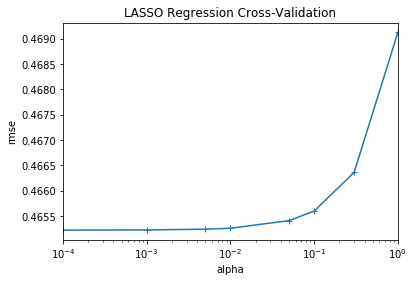

In [5]:
cv_lasso = pd.Series(lasso["CV error"].tolist(), index = lasso["lamda"].tolist())
cv_lasso.plot(title = "LASSO Regression Cross-Validation", style='-+') 
plt.xlabel("alpha") 
plt.ylabel("rmse") 
plt.xscale('log')

The best lambda in Lasso is 0.001





## KNN 
This part is made by XiangTing. Only K need to be optimize

In [6]:
# Load Data For KNN
from XGBoost.XGBoost_CS235 import Load_Data as Load_Data_KNN
from sklearn.neighbors.regression import KNeighborsRegressor

X_train, Y_train, X_test, Y_test = Load_Data_KNN(path)
knn_base = {"k": [5],
                  "CV error": [],
                  "CV std": []}
knn_basemodel = KNeighborsRegressor()
cv_score = -cross_val_score(knn_basemodel, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")

knn_base["CV error"] = np.mean(cv_score)
knn_base["CV std"] = np.std(cv_score)

knn_base = pd.DataFrame(knn_base)
knn_base

# 	k	CV error	CV std
# 0	5	0.380252	0.004984

,k,CV error,CV std
0,5,0.380252,0.004984


In [7]:
# K optimization
knn_mdels = {"k": [],
                  "CV error": [],
                  "CV std": []}
k_list = range(5,50,5)
for k in k_list:
    knn_model = KNeighborsRegressor(n_neighbors=k, n_jobs= 4)
    cv_score = -cross_val_score(knn_model, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")
    
    knn_mdels["k"].append(k)
    knn_mdels["CV error"].append(np.mean(cv_score))
    knn_mdels["CV std"].append(np.std(cv_score))
    
knn_mdels = pd.DataFrame(knn_mdels)
knn_mdels

# 	k	CV error	CV std
# 0	5	0.380252	0.004984
# 1	10	0.364216	0.004639
# 2	15	0.361765	0.004039
# 3	20	0.362062	0.004505
# 4	25	0.362992	0.004487
# 5	30	0.364213	0.004336
# 6	35	0.365166	0.004420
# 7	40	0.366303	0.004765
# 8	45	0.367205	0.004956

,k,CV error,CV std
0,5,0.380252,0.004984
1,10,0.364216,0.004639
2,15,0.361765,0.004039
3,20,0.362062,0.004505
4,25,0.362992,0.004487
5,30,0.364213,0.004336
6,35,0.365166,0.004420
7,40,0.366303,0.004765
8,45,0.367205,0.004956


Text(0,0.5,'rmse')

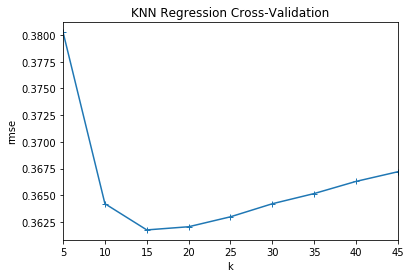

In [8]:

cv_knn = pd.Series(knn_mdels["CV error"].tolist(), index = knn_mdels["k"].tolist())
cv_knn.plot(title = "KNN Regression Cross-Validation", style='-+') 
plt.xlabel("k") 
plt.ylabel("rmse") 
# plt.xscale('log')


The Best K of KNN is 15

## RandomForest

This part is made by Faisal. Several params need to be optimized:  
n_estimator  
max_depth  


In [9]:
from sklearn.ensemble import RandomForestRegressor
# Base Model 
rf_base = {"n_estimators": [10],
            "max_depth": [4],
                  "CV error": [],
                  "CV std": []}
rf_basemodel = RandomForestRegressor(n_estimators=10, max_depth= 4)
cv_score = -cross_val_score(rf_basemodel, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")

rf_base["CV error"] = np.mean(cv_score)
rf_base["CV std"] = np.std(cv_score)

rf_base = pd.DataFrame(rf_base)
rf_base

#   n_estimators	max_depth	CV error	CV std
# 0	10	4	0.187757	0.003101

,n_estimators,max_depth,CV error,CV std
0,10,4,0.187732,0.00342


In [20]:
#  n_estimator and depth optimize
rf_mdels = {"n_estimators": [],
            "max_depth": [],
                  "CV error": [],
                  "CV std": []}
estimator_list = range(10,20,2)
max_depth = range(2,9)
for e in estimator_list:
    for d in max_depth:
        rf_model = RandomForestRegressor(n_estimators= e, max_depth=d, n_jobs= 4)
        cv_score = -cross_val_score(rf_model, X_train, Y_train, cv=5,scoring="neg_mean_squared_error")
        
        rf_mdels["n_estimators"].append(e)
        rf_mdels["max_depth"].append(d)
        rf_mdels["CV error"].append(np.mean(cv_score))
        rf_mdels["CV std"].append(np.std(cv_score))
        
rf_mdels = pd.DataFrame(rf_mdels)
rf_mdels



,n_estimators,max_depth,CV error,CV std
0,10,2,0.217879,0.002337
1,10,3,0.199514,0.002753
2,10,4,0.187519,0.002891
3,10,5,0.178794,0.003176
4,10,6,0.171072,0.002813
5,10,7,0.166204,0.003301
6,10,8,0.162504,0.003213
7,12,2,0.217710,0.003075
8,12,3,0.199140,0.003234
9,12,4,0.187596,0.002836


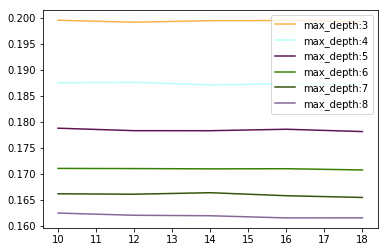

In [22]:
## Picture of RandomForest
import matplotlib as mlp
colors = np.random.choice(list(mlp.colors.XKCD_COLORS.keys()), len(max_depth), replace=False)
comment_list = []
for i, d in enumerate(max_depth):
    if i >0:
        plt.plot("n_estimators","CV error", data = rf_mdels[rf_mdels["max_depth"] == d], color = colors[i], label = "max_depth:" + str(d))
        comment_list.append("max_depth:" + str(d))
        
plt.legend(comment_list,loc='upper right')
plt.show()

Best params:
depth = 8
n_estimator = 18

## XGBoost  
This part is made by Xinlong. Several params need to be optimized:  
n_estimator  
max_depth  

In [30]:
from xgboost import XGBRegressor
xgb_baseline = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=5)

fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "rmse",
            "eval_set" : [(X_test, Y_test)],
            "verbose":False}

cv_res = -cross_val_score(xgb_baseline, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, fit_params = fit_params, n_jobs=5)

xgb_baseline_results = pd.DataFrame({
            "learning_rate": [0.05],
            'CV error': cv_res.mean(), 
            'CV std': cv_res.std()})